# Southern Ocean MULTIPLE STEPS eddy tracking

The objective of this script is to track the eddies in the Southern Ocean.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

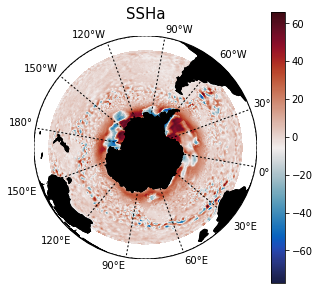

In [4]:
basemap_mplot(lon,lat,eta[0,:,:]-ssh_mean,title="SSHa",scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=1,yan=1,figsize=(5,5),fontsize=15)
colorbar()

In [5]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

## Analysis in just one level  

To extract or analyse the data in just one time step use the following two examples:

* **Possitive eddy tracking**
* **Negative eddy tracking**


In [6]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

#eta=eta[:,400:600,500:1000]
#ssh_mean=ssh_mean[400:600,500:1000]
#print(shape(eta),shape(ssh_mean))
#lon=lon[500:1000]
#lat=lat[400:600]

# Check dict_eddyt function

#### Possitive eddy tracking

In [7]:
# If you want to Analyse multiple levels, please go to the Moving in Z section.
eddytd=analyseddyt(eta,lon,lat,level=10,t0=0,t1=30,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',physics='',diagnostics=False,pprint=False)

 0% [=============================>]100% Time Elapsed: 2790 s  

In [ ]:
#for key,value in eddytd.items():
#    print(key)
#    ##print(value['time'])
#    print('contour',shape(value['contour']))
#    print('ellips',value['ellipse'])

#### Negative eddy tracking

In [ ]:
eddytdn=analyseddyt(eta,lon,lat,level=-10,t0=0,t1=30,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',physics='',diagnostics=False,pprint=False)

 0% [===========>]40% Time Elapsed: 801 s  

### Removing eddies from eddy field or any other variable.

In [ ]:
# SSHa Field used to extract eddies
ssha=eta-ssh_mean

In [ ]:
figure(figsize=(20,15))
for key,value in eddytdn.items():
    ##print(value['time'])
    #print('contour',value['contour'][0])
    #print('ellips',value['ellipse'][0])
    if type(value['time'])!=int:
        #print(value['position'][:,0])
        plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
        plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
        plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')
    #    for  ii in range(len(value['time'])):

In [ ]:
#This threshold will let you grow the domine around the eddy contour.
threshold=1
# Function that removes the eddies
## Positive remotion
print(eddytd['eddyn_0']['contour'][0][0].min())
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
## Negative remotion
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
basemap_mplot(lon,lat,[ssha[9,:,:],ssha[9,:,:]-eddysplot[9,:,:]-eddysplotn[9,:,:],eddysplotn[9,:,:],eddysplot[9,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)
quad1 = ax1.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)

ax2 = plt.subplot(gs[0,1])

lonmm,latmm=np.meshgrid(lon,lat)

quad2 = ax2.pcolormesh(lon,lat,ssha[0,:,:]-eddysplot[0,:,:]-eddysplotn[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)

def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    quad1.set_array(ssha[iter,:,:].ravel())
    quad2.set_array((ssha[iter,:,:]-eddysplot[iter,:,:]-eddysplotn[iter,:,:]).ravel())
    return quad1,quad2

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=False)

In [ ]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim2

# Analysis of eddies scanning in Z

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,30,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
basemap_mplot(lon,lat,[ssha[1,:,:],ssha[1,:,:]-eddysplot[1,:,:],eddysplot[1,:,:]]\
              ,title=["SSHa","Eddies extraction",
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [ ]:
basemap_mplot(lon,lat,[ssha[19,:,:],ssha[19,:,:]-eddysplot[19,:,:],eddysplot[19,:,:]]\
              ,title=["SSHa","Eddies extraction",
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,30,1,-5,-25,-5,data_meant=ssh_mean,areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
basemap_mplot(lon,lat,[ssha[0,:,:],ssha[0,:,:]-eddysplotn[0,:,:],eddysplotn[0,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [ ]:
basemap_mplot(lon,lat,[ssha[40,:,:],ssha[40,:,:]-eddysplotn[40,:,:],eddysplotn[40,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

eddy=eddytdn['eddyn_13']

for ii in range(0,len(eddy['time'])):
    figure()
    print(eddy['time'][ii])
    plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
    plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
    plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
    plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
    plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')
    show()
    

In [ ]:
figure(figsize=(20,15))
pcolormesh(lon,lat,ssha[0,:,:])
for key,value in eddytdn.items():
    #print(value['time'])
    
    if type(value['time'])!=int:
        #print(value['position'][:,0])
        plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
        plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
        plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')
    #    for  ii in range(len(value['time'])):



In [ ]:
basemap_mplot(lon,lat,[ssha[19,:,:],ssha[19,:,:]-eddysplot[19,:,:]-eddysplotn[19,:,:],eddysplotn[19,:,:],\
                       eddysplot[19,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);
plt.savefig('../output/eddy_removal.jpg', bbox_inches='tight')

In [ ]:
threshold=1
eddysplotn1=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
basemap_mplot(lon,lat,[eddysplotn[0,:,:],eddysplotn1[0,:,:]]\
              ,title=["Negative Eddies extraction","Negative Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=2,figsize=(20,10),fontsize=15);

# Eddy vs Ellipse fit

print(eddy['contour'][0])
print(eddy['ellipse'][0])

In [ ]:
from scipy.interpolate import interp1d
#eddy=eddytdn['eddyn_3']

def ellipsoidfit(y,yfit,diagnostics=False):
    x=range(0,len(y))
    f=interp1d(x, y)
    xnew=linspace(0,len(y)-1,len(yfit))
    eddy2fit=f(xnew)
    maxindxed=find(yfit,yfit.max())
    maxindxrd=find(eddy2fit,eddy2fit.max())
    
    eddy2fit=list(eddy2fit)*2
    eddyfitdisplace=zeros(len(yfit))
    for ii in range(len(yfit)):
        eddyfitdisplace[ii]=eddy2fit[maxindxrd-maxindxed+ii]
    Rsquard=rsquard(eddyfitdisplace,yfit)
    if diagnostics==True:
        plt.figure()
        plt.plot(eddy['ellipse'][0][0],eddy['ellipse'][0][1])
        plt.plot(eddy['contour'][0][0],eddy['contour'][0][1])
        plt.figure()
        plt.plot(eddy['ellipse'][0][1])
        plt.plot(eddyfitdisplace)
        plt.show()
    if Rsquard>=0.7:
        check=True
    return Rsquard,check

for key,eddy in eddytdn.items():
    y=eddy['contour'][0][1]
    yfit=eddy['ellipse'][0][1]
    Rsquard=ellipsoidfit(y,yfit,diagnostics=True)
    print(Rsquard)